In [3]:
import scipy.io as sio
test_1 = sio.loadmat('test_1.mat')
audio_1 = test_1['audio_1']
test_2 = sio.loadmat('test_2.mat')
audio_2 = test_2['audio_2']
whistle = audio_1[0,2:-1]
scream = audio_1[0,2:-1]
woo = audio_2[39,2:-1]

In [1]:
int(np.shape(audio_1)[0])

NameError: name 'np' is not defined

In [2]:

Audio(data=whistle_f,rate=44100)

NameError: name 'Audio' is not defined

In [6]:
w_nz = np.nonzero(whistle)[0][-1]
whistle_f = whistle[0:w_nz]

s_nz = np.nonzero(scream)[0][-1]
scream_f = scream[0:s_nz]

wo_nz = np.nonzero(woo)[0][-1]
woo_f = woo[0:wo_nz]

In [6]:
import librosa as lb
from IPython.display import Audio
import librosa.display
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [106]:
whistle = audio_2[45,2:-1]

s_nz = np.nonzero(whistle)[0][-1]
whistle_f = whistle[0:s_nz]

In [108]:
def getfeatures(fdata):

    data = np.array([lb.feature.rmse(y = fdata,frame_length=1024, hop_length=512)])[0,0]
    threshold = np.ndarray.max(data[1:10])

    length = fdata.size
    data_order = data.argsort()[-5:][::-1]
    for i in range(0,4):
        start = data_order[i] * 512 - 11030
        end = data_order[i] * 512 + 11024
        if length < end + 1 :
            end = length - 1
    
        fade = fdata[end] / 2
        target = np.append(fdata[start : end],[fade])
        target = np.append(target,0)
    
        if max(np.correlate(target,target,'same')) > 10:
            break
            
    flatness = np.ndarray.mean(lb.feature.spectral_flatness(target))
    bandwidth = np.ndarray.mean(lb.feature.spectral_bandwidth(target))
    
    f, t, Sxx = signal.spectrogram(target, 44100)
    mean_Sxx = np.mean(Sxx,axis = 1)
    data_order = mean_Sxx.argsort()[-5:][::-1]
    freq_max = f[data_order[0]]
         
    return flatness, bandwidth, freq_max

    # print(i)        
    # print(np.ndarray.mean(lb.feature.spectral_flatness(target)))
    # print(np.ndarray.mean(lb.feature.spectral_bandwidth(target)))

    # Audio(data=target,rate=44100)

0
0.0047584195
2080.071608935264


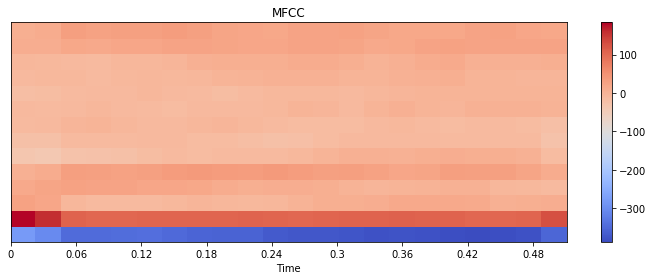

In [33]:
mfccs = lb.feature.mfcc(y=first, sr=44100, n_mfcc=14)
plt.figure(figsize=(10, 4))
lb.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [35]:
noise = audio_1[218,2:-1]

1550.390625


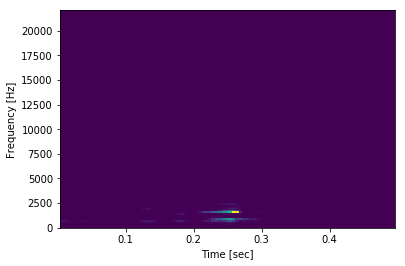

In [109]:
from scipy import signal
f, t, Sxx = signal.spectrogram(target, 44100)
mean_Sxx = np.mean(Sxx,axis = 1)
data_order = mean_Sxx.argsort()[-5:][::-1]
freq_max = f[data_order[0]]

print(freq_max)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [2]:
import pandas as pd

In [ ]:
# Get the data in (for each .mat)
test_1 = sio.loadmat('test_1.mat')
audio = test_1['audio_1']
num_row = int(np.shape(audio)[0])
flatness_all = []
bandwidth_all = []
freq_all = []

# For each audio clip, extract the features
for i in range(0,num_row-1):
    rdata = audio[i,2:-1]
    rdata_nz = np.nonzero(rdata)[0][-1]
    fdata = rdata[0:rdata_nz]
    
    flat,band,freq = getfeatures(fdata)
    
    flatness_all.append(flat)
    bandwidth_all.append(band)
    freq_all.apped(freq)
    
data = [flat,band,freq]
index = range(0,1499)
name = ['flux','bandwidth','freq']
df = pd.DataFrame(data,index = index, columns = name)



In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA